In [1]:
# Configures matplotlib
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import seaborn as sns
sns.set(style="white")

# Allows for interactive shell - outputs all non variable statements
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Common imports
import numpy as np
import numpy.random as rnd
import os

# to make this notebook's output stable across runs
rnd.seed(42)

# To plot pretty figures
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
DATA_DIR = './handson-ml/datasets/lifesat/'
CHAPTER_ID = "fundamentals"

# Frame the problem
# Data
## Get

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn

oecd_bli = pd.read_csv(DATA_DIR + 'oecd_bli_2015.csv', thousands=',')
gdp_per_capita = pd.read_csv(DATA_DIR + 'gdp_per_capita.csv', thousands=',',
                             delimiter='\t', na_values='n/a', encoding='latin1')

backup = oecd_bli, gdp_per_capita

## Explore

### Column types

In [3]:
oecd_bli = backup[0]
oecd_bli.info()
oecd_bli[oecd_bli['LOCATION'] == "MEX"]


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3292 entries, 0 to 3291
Data columns (total 17 columns):
LOCATION                 3292 non-null object
Country                  3292 non-null object
INDICATOR                3292 non-null object
Indicator                3292 non-null object
MEASURE                  3292 non-null object
Measure                  3292 non-null object
INEQUALITY               3292 non-null object
Inequality               3292 non-null object
Unit Code                3292 non-null object
Unit                     3292 non-null object
PowerCode Code           3292 non-null int64
PowerCode                3292 non-null object
Reference Period Code    0 non-null float64
Reference Period         0 non-null float64
Value                    3292 non-null float64
Flag Codes               1120 non-null object
Flags                    1120 non-null object
dtypes: float64(3), int64(1), object(13)
memory usage: 437.3+ KB


,LOCATION,Country,INDICATOR,Indicator,MEASURE,Measure,INEQUALITY,Inequality,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
17,MEX,Mexico,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,4.200000,NaN,NaN
54,MEX,Mexico,HO_BASE,Dwellings without basic facilities,L,Value,MN,Men,PC,Percentage,0,units,NaN,NaN,4.200000,E,Estimated value
90,MEX,Mexico,HO_BASE,Dwellings without basic facilities,L,Value,WMN,Women,PC,Percentage,0,units,NaN,NaN,4.200000,E,Estimated value
126,MEX,Mexico,HO_HISH,Housing expenditure,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,21.000000,NaN,NaN
163,MEX,Mexico,HO_HISH,Housing expenditure,L,Value,MN,Men,PC,Percentage,0,units,NaN,NaN,21.000000,E,Estimated value
199,MEX,Mexico,HO_HISH,Housing expenditure,L,Value,WMN,Women,PC,Percentage,0,units,NaN,NaN,21.000000,E,Estimated value
235,MEX,Mexico,HO_NUMR,Rooms per person,L,Value,TOT,Total,RATIO,Ratio,0,units,NaN,NaN,1.000000,NaN,NaN
272,MEX,Mexico,HO_NUMR,Rooms per person,L,Value,MN,Men,RATIO,Ratio,0,units,NaN,NaN,1.000000,E,Estimated value
308,MEX,Mexico,HO_NUMR,Rooms per person,L,Value,WMN,Women,RATIO,Ratio,0,units,NaN,NaN,1.000000,E,Estimated value
344,MEX,Mexico,IW_HADI,Household net adjusted disposable income,L,Value,TOT,Total,USD,US Dollar,0,units,NaN,NaN,13085.000000,NaN,NaN


In [4]:
oecd_bli = backup[0]
oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
oecd_bli.head(2)

Indicator,Air pollution,Assault rate,Consultation on rule-making,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Homicide rate,Household net adjusted disposable income,Household net financial wealth,...,Long-term unemployment rate,Personal earnings,Quality of support network,Rooms per person,Self-reported health,Student skills,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education
Country,,,,,,,,,,,,,,,,,,,,,
Australia,13.0,2.1,10.5,1.1,76.0,14.02,72.0,0.8,31588.0,47657.0,...,1.08,50449.0,92.0,2.3,85.0,512.0,14.41,93.0,91.0,19.4
Austria,27.0,3.4,7.1,1.0,83.0,7.61,72.0,0.4,31173.0,49887.0,...,1.19,45199.0,89.0,1.6,69.0,500.0,14.46,75.0,94.0,17.0


## Prepare

### Prepare X, Y

In [7]:
oecd_bli = backup[0]
gdp_per_capita = backup[1]

gdp_per_capita = gdp_per_capita.set_index('Country')
gdp_per_capita = gdp_per_capita['2015'].to_frame()
gdp_per_capita = gdp_per_capita.rename(index=str, columns={"2015": "GDP"})
# gdp_per_capita

oecd_bli = backup[0]
# Grabbing rows only where the column "INEQUALITY" is "TOT"
oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
df = oecd_bli.merge(gdp_per_capita, how='inner', left_index=True, right_index=True)

X = df.loc[:, df.columns != 'GDP']
y = df['GDP']

### Create training and test data

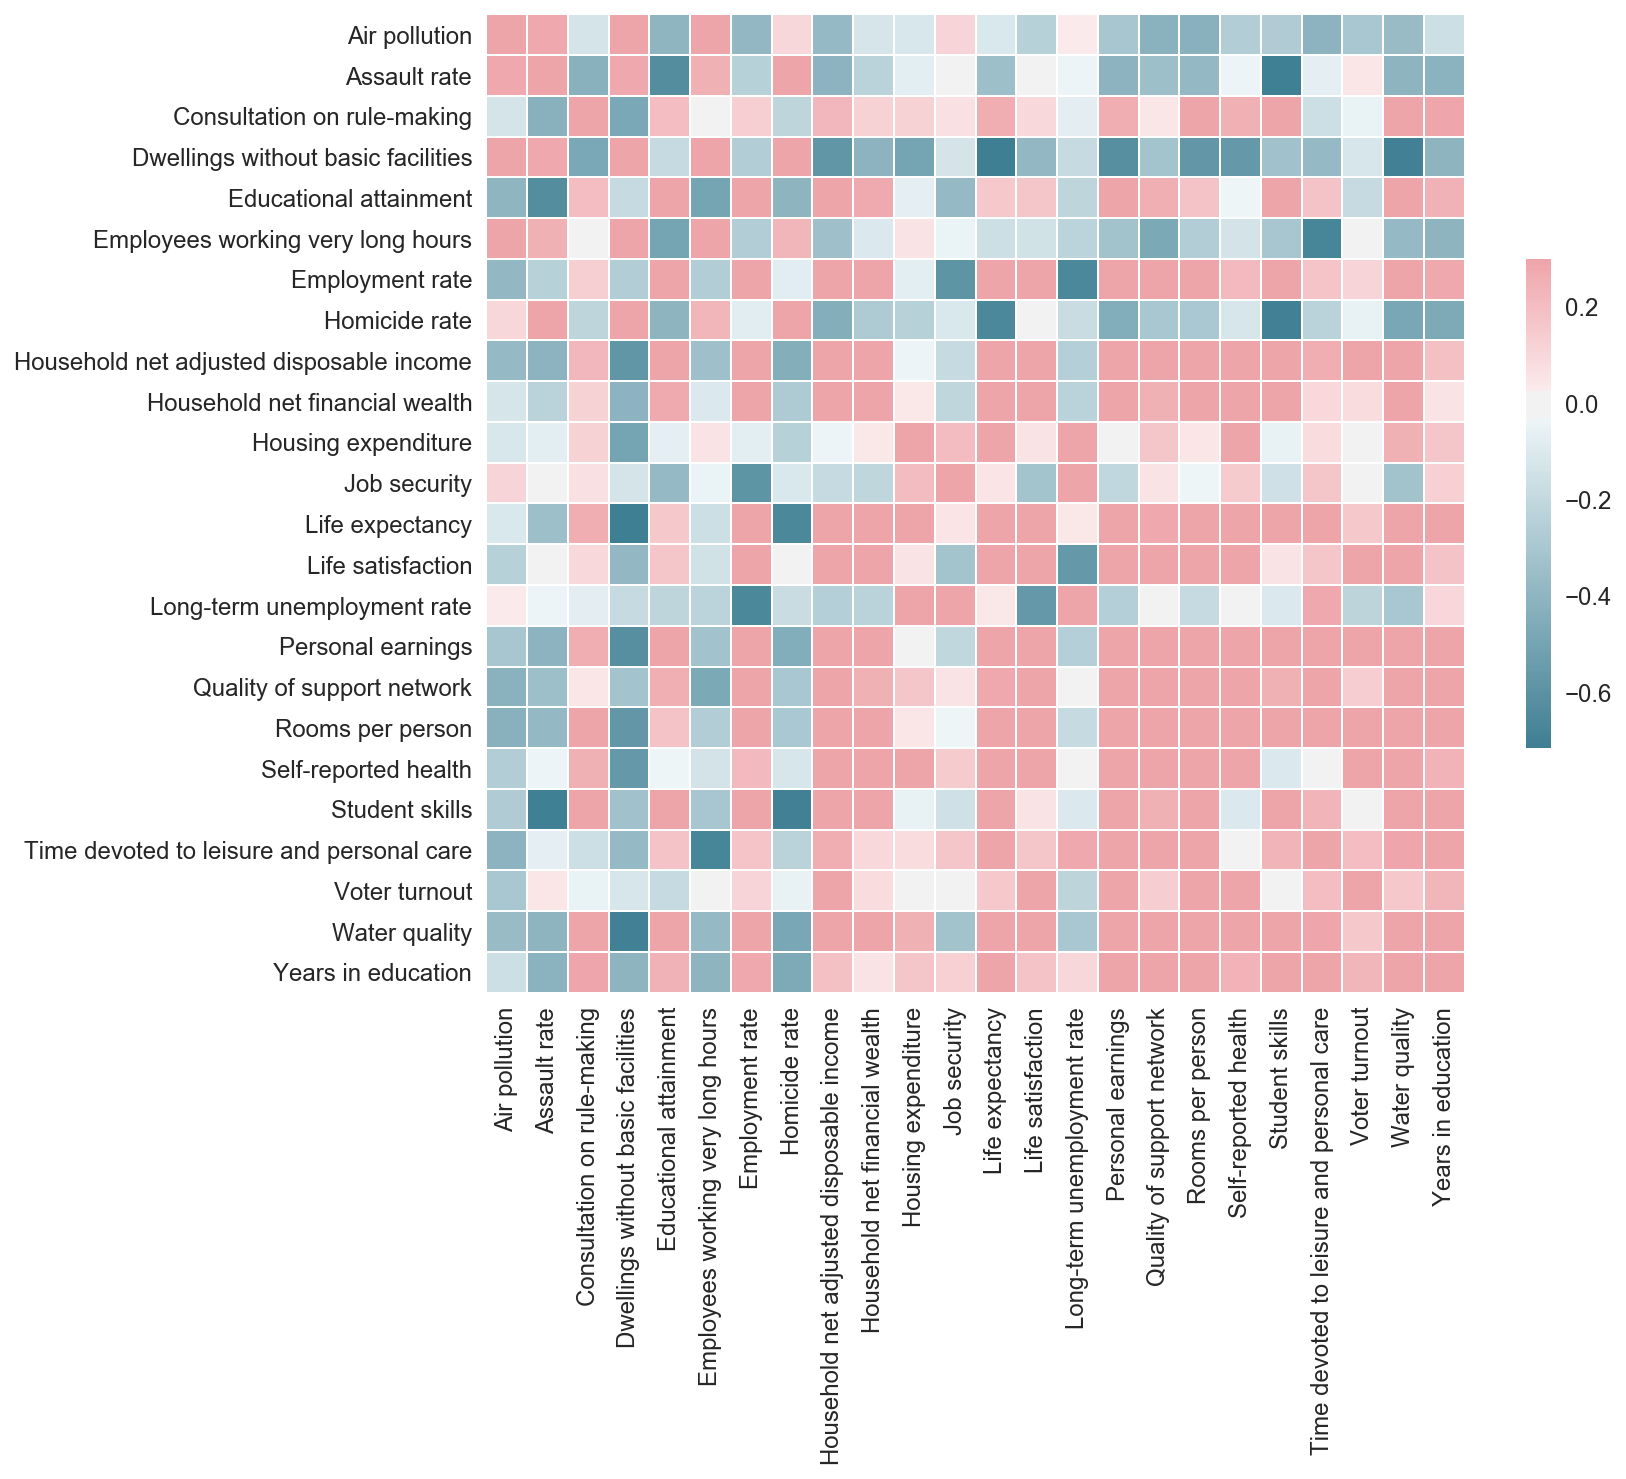

In [8]:
# Which parameters are important

# Compute the correlation matrix
corr = X.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, 
            #mask=mask, 
            cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


# Learn
## Short list different models

## Fine tune / combine your models
# Present
# Launch